Cesare asked for direct f4-ratio estimate of Neanderthal ancestry in Oase1. It was a lot of pain to re-create the Neanderthal ancestry decline project environment, so here's a quick calculation from scratch:

In [ ]:
## one needs my R package admixr (https://www.bodkan.net/admixr)
## devtools::install_github("bodkan/admixr") - might take a bit of
## time to compile because it drags many R pkg dependencies
library(admixr)

In [ ]:
## this loads EIGENSTRAT data I compiled for the project as an
## R object for use with my R package
snps <- eigenstrat("/mnt/expressions/mp/nea-over-time/data/eigenstrat/bigyri_ho/all")

In [ ]:
## X is the test sample, X, A, B, C, O is a nomenclature of
## Patterson et al., 2012 (the "Admixtools paper")
##
## because we found that the African used as a "baseline"
## obviously matters (although not dramatically so - not unless
## one uses a super Eurasian-admixed African as this "baseline"),
## here I calculated the direct f4-ratio using two Africans as
## an example
nea_est <- lapply(c("Dinka", "Yoruba"), function(afr) {
  f4ratio(
    X = c("Oase1", "French", "Kostenki14"),
    A = "new_Altai", B = "new_Vindija", C = afr,
    O = "Chimp",
    data = snps
  )
})

In [10]:
## output:
##
## > nea_est
## [[1]]
## # A tibble: 3 x 8
##   A         B           X          C     O      alpha  stderr Zscore
##   <chr>     <chr>       <chr>      <chr> <chr>  <dbl>   <dbl>  <dbl>
## 1 new_Altai new_Vindija Oase1      Dinka Chimp 0.0679 0.00756   8.98
## 2 new_Altai new_Vindija French     Dinka Chimp 0.0205 0.00265   7.73
## 3 new_Altai new_Vindija Kostenki14 Dinka Chimp 0.0220 0.00387   5.67

## [[2]]
## # A tibble: 3 x 8
##   A         B           X          C      O      alpha  stderr Zscore
##   <chr>     <chr>       <chr>      <chr>  <chr>  <dbl>   <dbl>  <dbl>
## 1 new_Altai new_Vindija Oase1      Yoruba Chimp 0.0685 0.00755   9.08
## 2 new_Altai new_Vindija French     Yoruba Chimp 0.0231 0.00272   8.49
## 3 new_Altai new_Vindija Kostenki14 Yoruba Chimp 0.0233 0.00375   6.22


# Neanderthal ancestry decline results

In [1]:
library(data.table)
library(ggplot2)

In [2]:
nea <- as.data.table(readRDS(url("https://github.com/bodkan/nea-over-time/raw/master/data/rds/nea_estimates.rds")))
head(nea)

A,B,X,C,O,alpha,stderr,Zscore,stat,id,sex,snp_count,sites,age,pop
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>
West_and_Central_Africans,Archaics,UstIshim,Dinka,Chimp,0.044160,0.004557,9.690,indirect_f4,Ust_Ishim,M,2137615,all,45020,EMH
West_and_Central_Africans,Archaics,Kostenki14,Dinka,Chimp,0.036497,0.004619,7.902,indirect_f4,I0876,M,1747365,all,37470,EMH
West_and_Central_Africans,Archaics,GoyetQ116-1,Dinka,Chimp,0.032421,0.004894,6.624,indirect_f4,Q116-1,M,846983,all,34795,EMH
West_and_Central_Africans,Archaics,Muierii2,Dinka,Chimp,0.052321,0.010977,4.766,indirect_f4,I0909.damage,F,98011,all,33300,EMH
West_and_Central_Africans,Archaics,Paglicci133,Dinka,Chimp,0.035155,0.010402,3.380,indirect_f4,GA252snp,M,82330,all,32895,EMH
West_and_Central_Africans,Archaics,Cioclovina1,Dinka,Chimp,0.039143,0.026777,1.462,indirect_f4,Cioclovina_d,M,12784,all,32435,EMH


In [3]:
nea_subset <- nea[C == "Dinka" & sites == "all" & stat == "direct_f4" & pop %in% c("EMH", "WestEurasia") & snp_count >= 200000]

In [4]:
# some SGDP pops have multiple individuals -> average over them
nea_subset[, alpha := mean(alpha), by = "X"]

nea_subset <- unique(nea_subset[, c("X", "alpha", "stderr", "age")])

`geom_smooth()` using formula 'y ~ x'



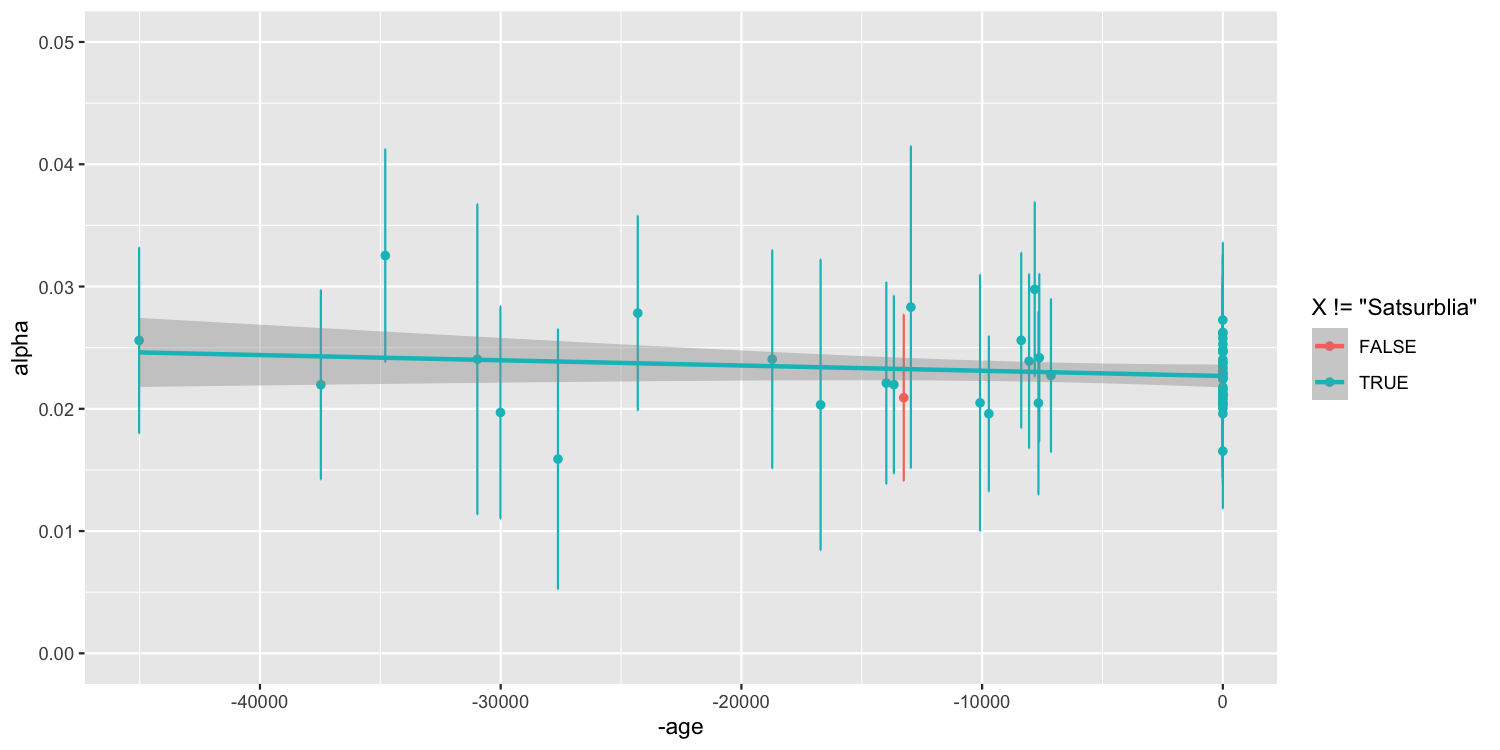

In [5]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 150)

ggplot(nea_subset, aes(-age, alpha, color = X != "Satsurblia")) +
    geom_point() +
    geom_errorbar(aes(ymin=alpha - 2 * stderr, ymax=alpha + 2 * stderr)) +
    geom_smooth(method = "lm") +
    coord_cartesian(ylim = c(0, 0.05))